In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from scipy.io import wavfile
sns.set_palette('colorblind')

In [2]:
songname = 'simple'

sr, tutor = wavfile.read('../data/{}.wav'.format(songname))
sr, synth = wavfile.read('../data/{}_out.wav'.format(songname))

In [3]:
sim = bsa.similarity(synth, tutor, samplerate=sr, threshold=0.05)

In [4]:
sim['similarity']

0.34382600561272214

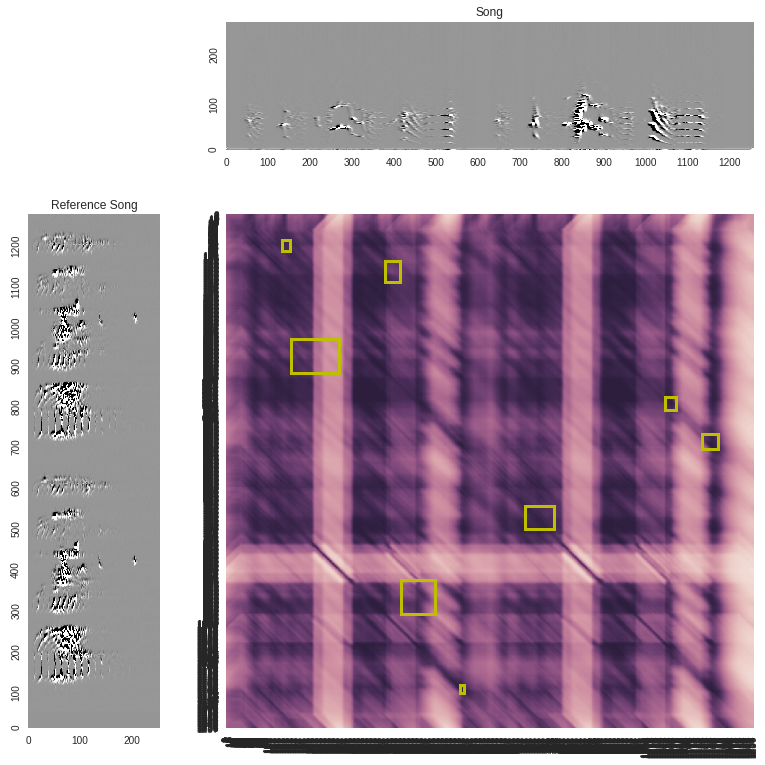

In [5]:
fig = bsa.similarity_plot(sim, synth, tutor)
plt.show(fig)

In [6]:
fstep = 40
fsize = 1024

In [7]:
sdt = bsa.spectral_derivs(tutor, 256, fstep, fsize)
sds = bsa.spectral_derivs(synth, 256, fstep, fsize)

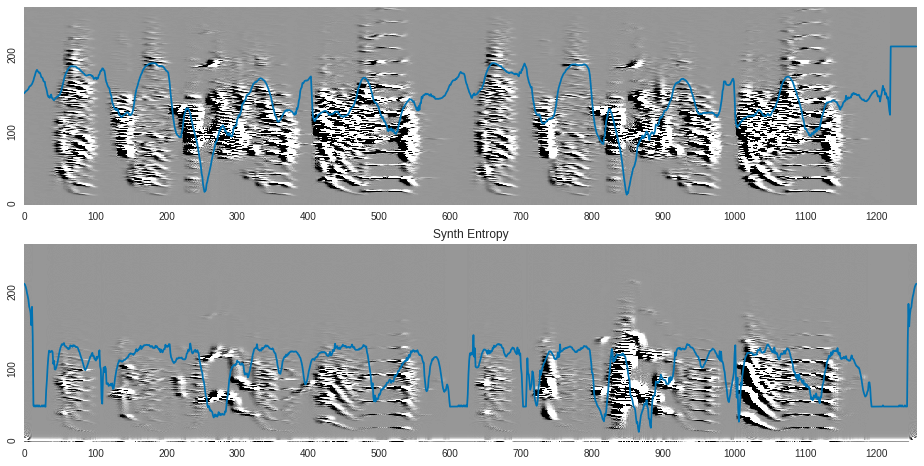

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, contrast=0.01, ax=ax1)
bsa.plot_over_spec(bsa.song_wiener_entropy(tutor, 256, fstep, fsize), ax1)

ax2 = bsa.spectral_derivs_plot(sds, contrast=0.01, ax=ax2)
bsa.plot_over_spec(bsa.song_wiener_entropy(synth, 256, fstep, fsize), ax2)
ax2.set_title('Synth Entropy')
plt.show(fig)

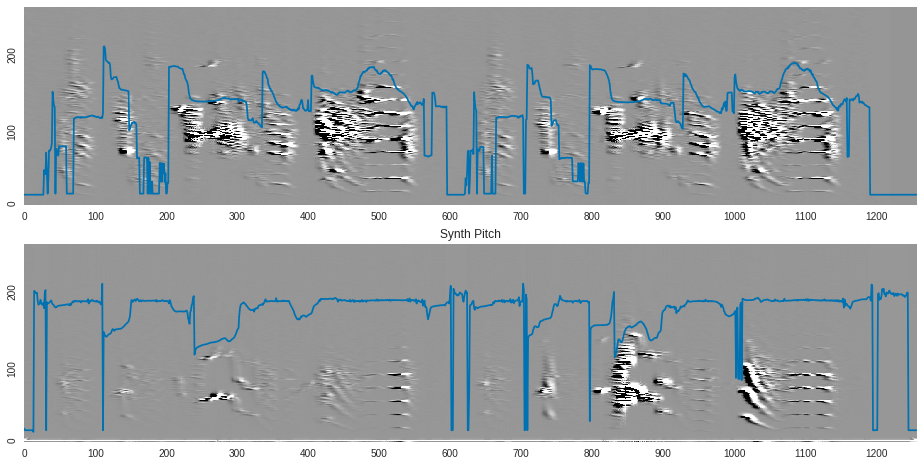

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_pitch(tutor, sr, 0.8, 256, fstep, fsize), ax1)

pitch = bsa.song_pitch(synth, sr, 0.8, 256, fstep, fsize)
ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(pitch, ax2)
ax2.set_title('Synth Pitch')
plt.show(fig)

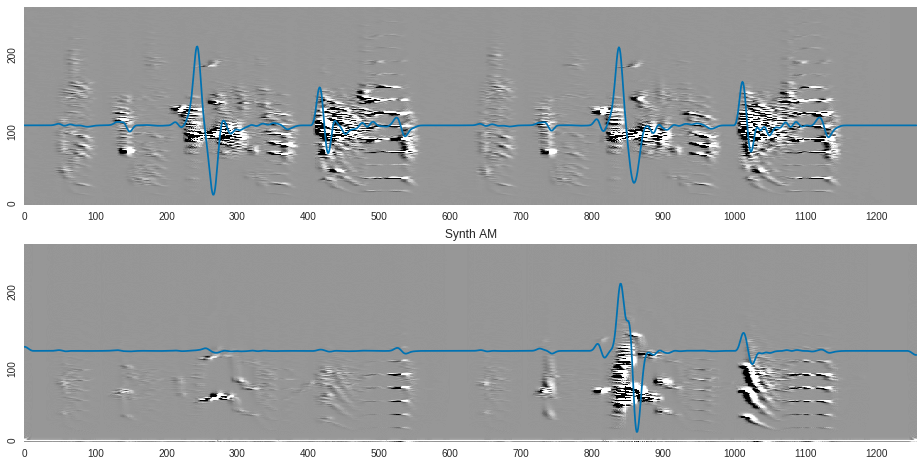

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_amplitude_modulation(tutor, 256, fstep, fsize), ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(bsa.song_amplitude_modulation(synth, 256, fstep, fsize), ax2)
ax2.set_title('Synth AM')

plt.show(fig)

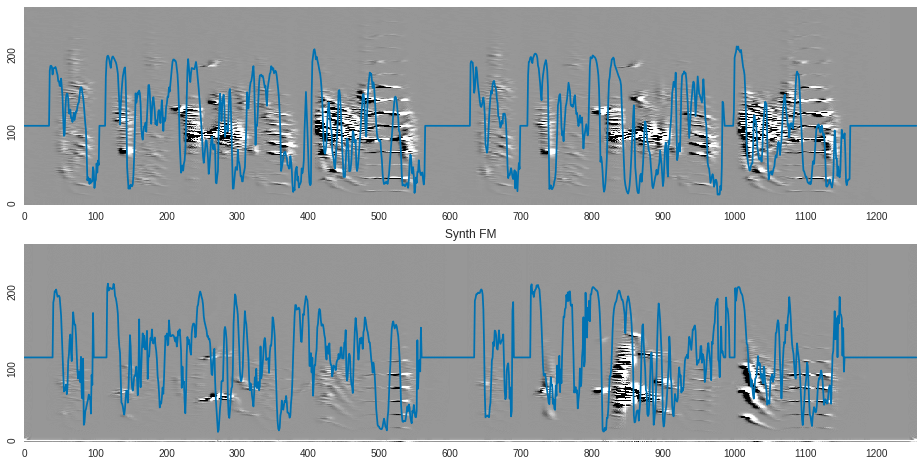

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
fm = bsa.song_frequency_modulation(tutor, 256, fstep, fsize)
fm[bsa.song_amplitude(tutor, 256, fstep, fsize) < 60] = np.median(fm[bsa.song_amplitude(tutor, 256, fstep, fsize) > 60])
bsa.plot_over_spec(fm, ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
fm = bsa.song_frequency_modulation(synth, 256, fstep, fsize)
fm[bsa.song_amplitude(synth, 256, fstep, fsize) < 60] = np.median(fm[bsa.song_amplitude(synth, 256, fstep, fsize) > 60])
bsa.plot_over_spec(fm, ax2)
ax2.set_title('Synth FM')
plt.show(fig)

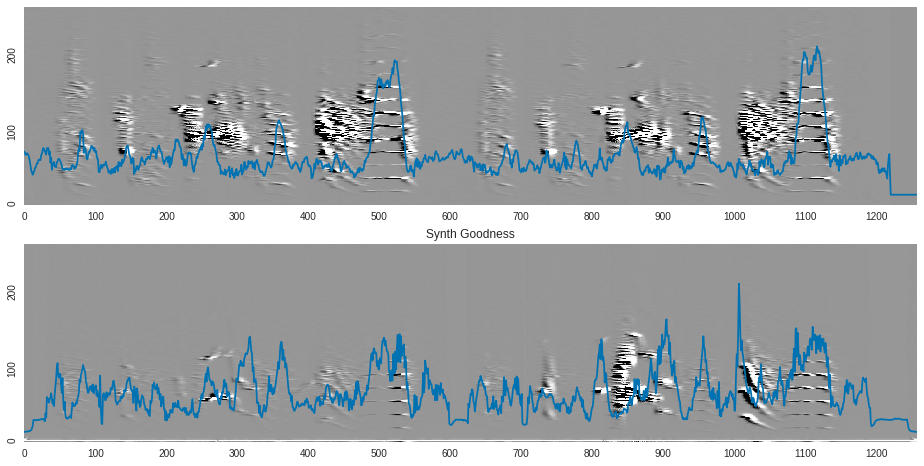

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_goodness(tutor, 256, fstep, fsize), ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(bsa.song_goodness(synth, 256, fstep, fsize), ax2)
ax2.set_title('Synth Goodness')
plt.show(fig)

# Let see for one syllable

In [24]:
sr, tutor = wavfile.read('../data/ba_syllable_a_end.wav')
sr, synth = wavfile.read('../data/ba_syllable_a_end_out.wav')
sr, hillc = wavfile.read('../model/hillclimbing/res/170228_1647/out_0_212.47077932292058.wav')

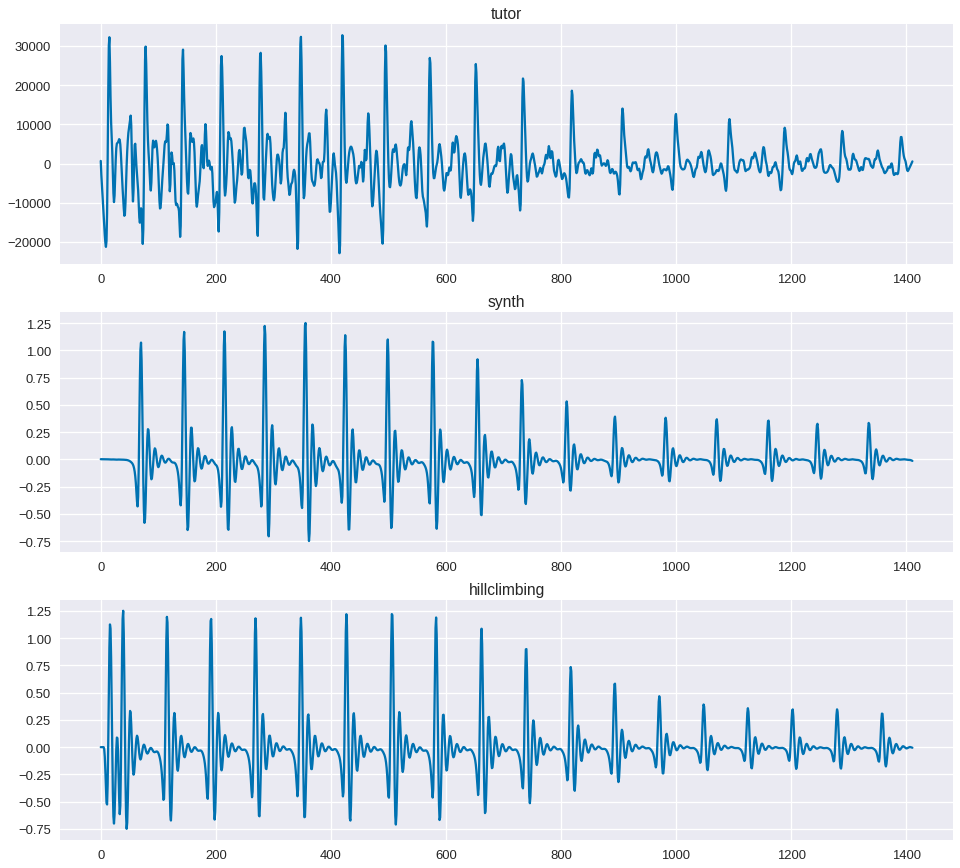

In [25]:
fig, axs = plt.subplots(3, 1, figsize=(16, 5*3))
axs[0].plot(tutor)
axs[0].set_title('tutor')
axs[1].plot(synth - np.mean(synth))
axs[1].set_title('synth')
axs[2].plot(hillc - np.mean(hillc))
axs[2].set_title('hillclimbing')
plt.show()

In [26]:
fsize = 1024
fstep = 40
tfeat = bsa.all_song_features(tutor, sr, pitch_threshold=0.8, fft_size=fsize, fft_step=fstep)
sfeat = bsa.all_song_features(synth, sr, pitch_threshold=0.8, fft_size=fsize, fft_step=fstep)
hfeat = bsa.all_song_features(hillc, sr, pitch_threshold=0.8, fft_size=fsize, fft_step=fstep)

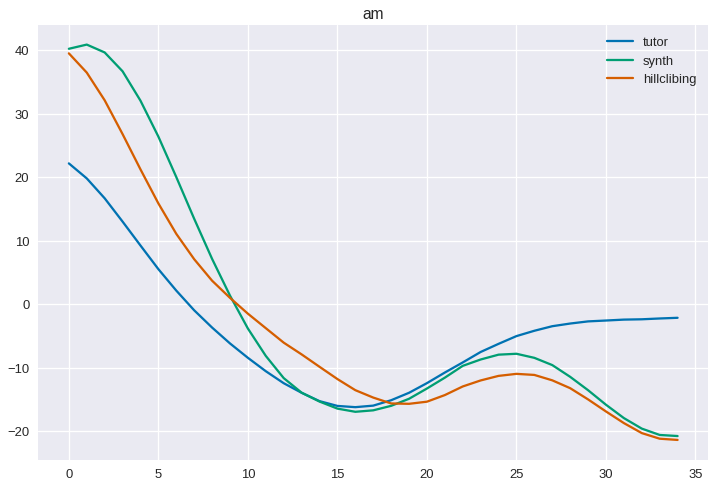

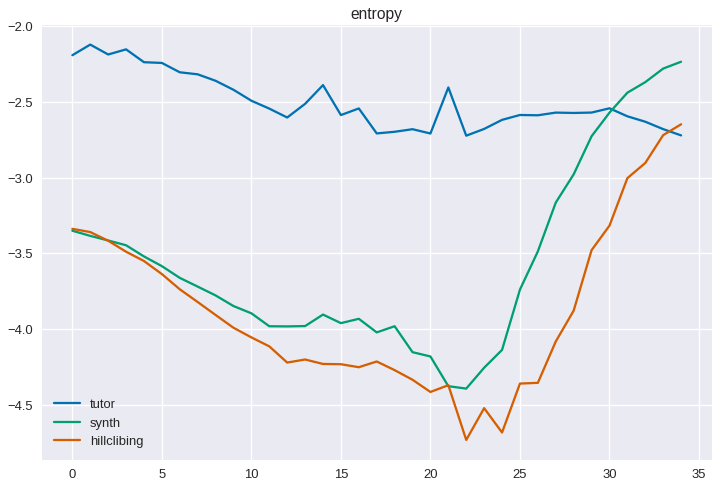

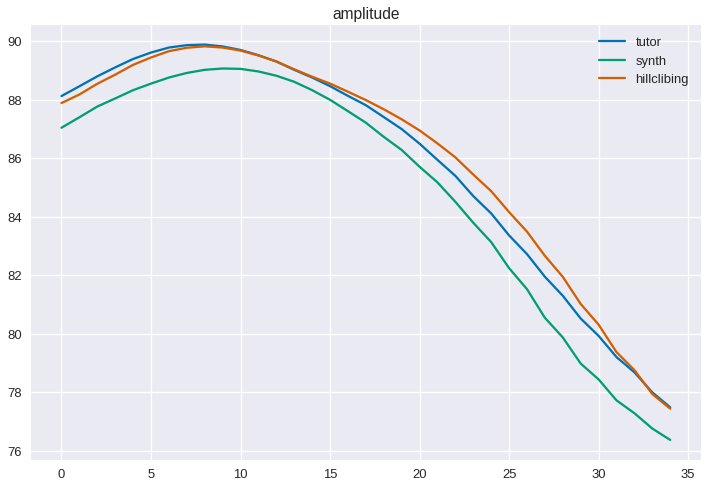

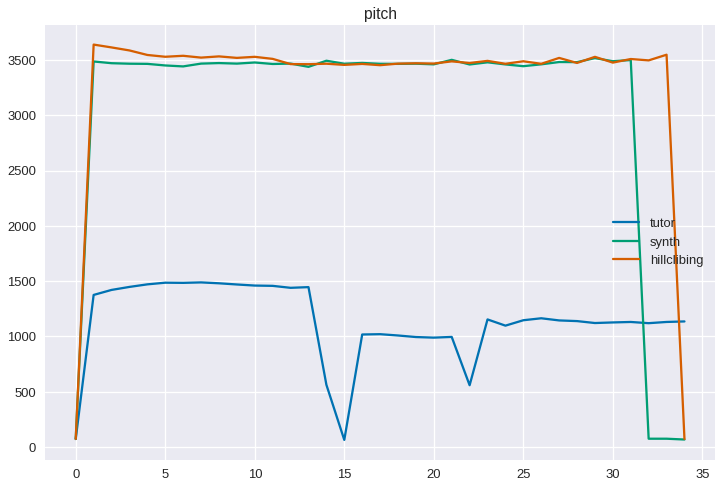

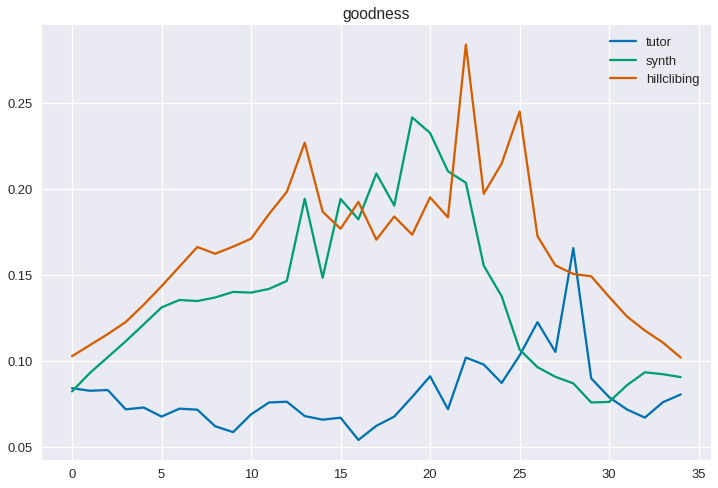

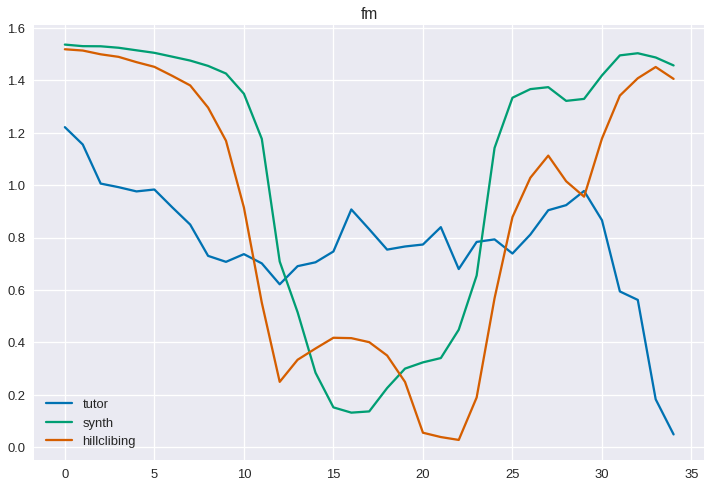

In [21]:
sns.set_context('talk')

for fname in tfeat:
    plt.figure(figsize=(12, 12/(1.5)))
    plt.plot(tfeat[fname], label='tutor')
    plt.plot(sfeat[fname], label='synth')
    plt.plot(hfeat[fname], label='hillclibing')
    plt.legend()
    plt.title(fname)
    plt.show()

In [17]:
for fname in tfeat:
    print("*"*40)
    print(fname)
    print('tutor: mean: {}, std: {}'.format(np.mean(tfeat[fname]), np.std(tfeat[fname])))
    print('synth: mean: {}, std: {}'.format(np.mean(sfeat[fname]), np.std(sfeat[fname])))
    print('hill: mean: {}, std: {}'.format(np.mean(hfeat[fname]), np.std(hfeat[fname])))

****************************************
am
tutor: mean: -3.897821135459007, std: 9.975291150363471
synth: mean: -2.077973802555358, std: 19.463877217570616
hill: mean: -1.5996300569783612, std: 6.247184443836028
****************************************
entropy
tutor: mean: -2.498840820921307, std: 0.1794879527126977
synth: mean: -3.566708322371959, std: 0.6078794344545198
hill: mean: -3.3008489896539617, std: 0.31757872191943326
****************************************
amplitude
tutor: mean: 85.94147018221132, std: 3.954350829292102
synth: mean: 84.99279886762938, std: 4.190098091294724
hill: mean: 81.7330028394035, std: 2.9590313515077433
****************************************
pitch
tutor: mean: 1137.7829550606864, std: 354.1263447631948
synth: mean: 3081.810687473842, std: 1080.9142992297154
hill: mean: 2833.188312857492, std: 1252.797595280191
****************************************
goodness
tutor: mean: 0.08088448169955627, std: 0.02049414303332741
synth: mean: 0.13768147078110